In [34]:
# Import library
import glob

# The books files are contained in this folder
folder = "files/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + '*.txt')
files.sort()
# ... YOUR CODE FOR TASK 1 ...
files

['files\\Autobiography.txt',
 'files\\CoralReefs.txt',
 'files\\DescentofMan.txt',
 'files\\DifferentFormsofFlowers.txt',
 'files\\EffectsCrossSelfFertilization.txt',
 'files\\ExpressionofEmotionManAnimals.txt',
 'files\\FormationVegetableMould.txt',
 'files\\FoundationsOriginofSpecies.txt',
 'files\\GeologicalObservationsSouthAmerica.txt',
 'files\\InsectivorousPlants.txt',
 'files\\LifeandLettersVol1.txt',
 'files\\LifeandLettersVol2.txt',
 'files\\MonographCirripedia.txt',
 'files\\MonographCirripediaVol2.txt',
 'files\\MovementClimbingPlants.txt',
 'files\\OriginofSpecies.txt',
 'files\\PowerMovementPlants.txt',
 'files\\VariationPlantsAnimalsDomestication.txt',
 'files\\VolcanicIslands.txt',
 'files\\VoyageBeagle.txt']

In [35]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    data = re.sub('[\W_]+', ' ', f.read())
    # Store the texts and titles of the books in two separate lists
    titles.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)

# Print the length, in characters, of each book
[len(t) for t in txts]

[123231,
 496068,
 1776539,
 617088,
 913713,
 624232,
 335920,
 523021,
 797401,
 901406,
 1047518,
 1010643,
 767492,
 1660866,
 298319,
 916267,
 1093567,
 1043499,
 341447,
 1149574]

In [36]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    if titles[i] == 'OriginofSpecies':
        ori = i
        break

# Print the stored index
ori

15

In [37]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens for the "On the Origin of Species" book
texts[ori][: 20]

['on',
 'origin',
 'species',
 'but',
 'with',
 'regard',
 'material',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'this',
 'can',
 'perceive',
 'events',
 'are',
 'brought',
 'about']

In [65]:
pip install ftplib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ftplib (from versions: none)
ERROR: No matching distribution found for ftplib
You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [73]:
# Load the stemmed tokens list from the pregenerated pickle file
with open(fname, 'rb') as f:
    texts_stem = [x.decode('utf8').strip() for x in f.readlines()]

#texts_stem = pickle.load(open(lines, 'r'))

# Print the 20 first stemmed tokens from the "On the Origin of Species" book
print(f.readlines)

<built-in method readlines of _io.BufferedReader object at 0x0000017D9B0C1EB0>


In [76]:
%%time

# stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

txts_lower_case = [txt.lower() for txt in txts]
txts_split = [txt.split() for txt in txts_lower_case]
texts_stem = [[word for word in txt if word not in stoplist] for txt in txts_split]

print(texts[ori][:20])

['on', 'origin', 'species', 'but', 'with', 'regard', 'material', 'world', 'can', 'least', 'go', 'so', 'far', 'this', 'can', 'perceive', 'events', 'are', 'brought', 'about']
Wall time: 669 ms


In [77]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(txt) for txt in texts_stem]

# Print the first five elements of the On the Origin of species' BoW model
bows[ori][: 5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

In [78]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[ori])
# Add the column names to the DataFrame
df_bow_origin.columns = ['index', 'occurrences']

# Add a column containing the token corresponding to the dictionary index
df_bow_origin['token'] = df_bow_origin['index'].apply(lambda x: dictionary[x])

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin = df_bow_origin.sort_values('occurrences', ascending=False)
df_bow_origin.head(10)

,index,occurrences,token
937,1532,1769,have
1366,2255,1558,on
1819,2989,1543,species
293,498,1362,by
1378,2272,1201,or
148,263,1140,are
838,1383,1137,from
1097,1787,1067,it
2143,3495,1000,with
1966,3199,962,this


In [79]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
model[bows[ori]]

[(8, 0.00018788005522520527),
 (21, 0.0005268692945628058),
 (23, 0.0015778966633340156),
 (27, 0.0005952837659145207),
 (28, 0.0023668449950010233),
 (31, 0.0007889483316670078),
 (35, 0.0009355408689337211),
 (36, 0.0009355408689337211),
 (51, 0.0008173431487418303),
 (54, 0.0018710817378674422),
 (56, 0.002189792058762732),
 (57, 9.394002761260263e-05),
 (63, 0.0025388997161860196),
 (64, 0.00046970013806301315),
 (66, 0.00018788005522520527),
 (67, 0.002189792058762732),
 (68, 0.0018710817378674422),
 (75, 0.0012694498580930098),
 (76, 0.00040867157437091513),
 (78, 0.0038453493986404324),
 (83, 0.003919349047363238),
 (84, 0.0005268692945628058),
 (88, 0.0022545606627024633),
 (89, 0.0024424407179276684),
 (90, 0.0013064496824544128),
 (91, 0.003269372594967321),
 (98, 0.0010537385891256116),
 (99, 0.0009355408689337211),
 (100, 0.0020433578718545755),
 (101, 0.002701444275649242),
 (102, 0.003808349574279029),
 (103, 0.0024520294462254907),
 (105, 0.0011272803313512316),
 (110, 0

In [80]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ['id', 'score']

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf = df_tfidf.sort_values('score', ascending=False)
df_tfidf.head(10)

,id,score,token
1175,2836,0.273701,selection
685,1638,0.198888,hybrids
3897,10978,0.157743,fertility
3449,8778,0.145621,breeds
392,980,0.130976,domestic
3688,10071,0.130753,descendants
2483,5857,0.130176,modification
4319,13056,0.123479,migration
1256,3037,0.123137,sterility
5736,22771,0.114657,gärtner


In [81]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.038153,0.076702,0.018098,0.039014,0.070806,0.019534,0.052877,0.028341,0.013632,0.379821,0.204256,0.004981,0.007484,0.013234,0.085784,0.011877,0.041907,0.035423,0.144199
CoralReefs,0.038153,1.000000,0.010015,0.000747,0.001574,0.004884,0.013419,0.019668,0.058891,0.002585,0.028477,0.016043,0.006248,0.008955,0.001712,0.034483,0.003086,0.011430,0.058673,0.182059
DescentofMan,0.076702,0.010015,1.000000,0.022756,0.028310,0.151065,0.016202,0.129463,0.011284,0.009790,0.063648,0.080221,0.045523,0.037804,0.006865,0.247028,0.014310,0.222993,0.010511,0.122918
DifferentFormsofFlowers,0.018098,0.000747,0.022756,0.999999,0.201567,0.002514,0.002410,0.015140,0.001200,0.003534,0.005256,0.018751,0.003074,0.001988,0.003674,0.049434,0.008015,0.020774,0.001347,0.004633
EffectsCrossSelfFertilization,0.039014,0.001574,0.028310,0.201567,1.000000,0.006254,0.013697,0.032898,0.002818,0.007014,0.014794,0.028192,0.002454,0.002530,0.014141,0.121459,0.037317,0.052402,0.002258,0.014835
ExpressionofEmotionManAnimals,0.070806,0.004884,0.151065,0.002514,0.006254,1.000000,0.011221,0.040197,0.005541,0.011450,0.060466,0.045345,0.014538,0.023537,0.007971,0.053504,0.012193,0.073349,0.006246,0.082018
FormationVegetableMould,0.019534,0.013419,0.016202,0.002410,0.013697,0.011221,1.000000,0.010962,0.032865,0.019908,0.014664,0.013001,0.010204,0.011401,0.016409,0.024186,0.021566,0.016288,0.031435,0.050791
FoundationsOriginofSpecies,0.052877,0.019668,0.129463,0.015140,0.032898,0.040197,0.010962,1.000000,0.029641,0.005758,0.058342,0.051832,0.008129,0.010843,0.004951,0.303237,0.009527,0.173405,0.019420,0.078996
GeologicalObservationsSouthAmerica,0.028341,0.058891,0.011284,0.001200,0.002818,0.005541,0.032865,0.029641,1.000000,0.008458,0.028077,0.012428,0.009610,0.017803,0.002703,0.057091,0.004771,0.014852,0.389137,0.244747
InsectivorousPlants,0.013632,0.002585,0.009790,0.003534,0.007014,0.011450,0.019908,0.005758,0.008458,1.000000,0.006295,0.016352,0.017069,0.019609,0.278834,0.013305,0.025788,0.010494,0.011270,0.014502


Text(0.5, 1.0, 'Similarity')

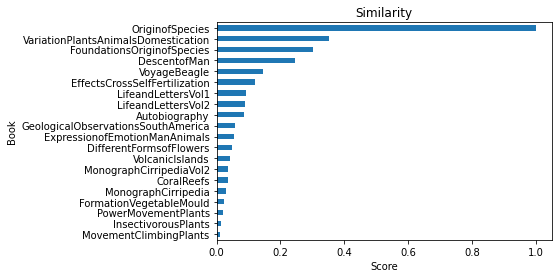

In [82]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['OriginofSpecies']

# Sort by ascending scores
v_sorted = v.sort_values()

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for a better readability
plt.xlabel("Score")
plt.ylabel("Book")
plt.title("Similarity")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [140.0, 140.0, 171.25, 171.25],
  [110.0, 110.0, 155.625, 155.625],
  [63.75, 63.75, 132.8125, 132.8125],
  [40.0, 40.0, 98.28125, 98.28125],
  [12.5, 12.5, 69.140625, 69.140625]],
 'dcoord': [[0.0, 0.268837935065866, 0.268837935065866, 0.0],
  [0.0, 1.339448164423598, 1.339448164423598, 0.268837935065866],
  [0.0, 0.6857114302156758, 0.6857114302156758, 0.0],
  [0.0, 0.9324582487582296, 0.9324582487582296, 0.0],
  [0.0, 1.150002634152605, 1.150002634152605, 0.9324582487582296],
  [0.0, 1.2000052044357763, 1.2000052044357763, 1.150002634152605],
  [0.0, 0.871896

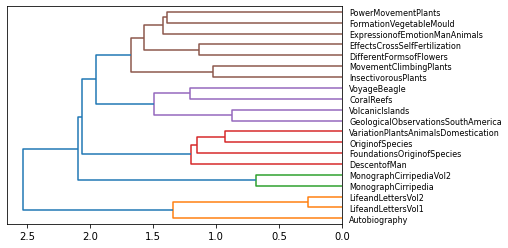

In [83]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sims, 'ward')

# Display this result as a horizontal dendrogram
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation='left')
